In [1]:
#Import required library
import pandas as pd
import numpy as np

In [2]:
#Read the CSV file
data = pd.read_csv(r"C:\Users\User\Desktop\Inceptez_datascience\Noor\Linear Regression - 2\Excersice\Insurance\insurance.csv")

In [3]:
#Shape of the database
data.shape

(1338, 7)

In [4]:
#Get the max, min, mean & std
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [5]:
#additional information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
#get the null values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [11]:
#get the categorical and numerical future
categorical_data = data.select_dtypes(exclude=np.number)
print("categorical_data:",categorical_data.shape[1])
numerical_data = data.select_dtypes(include=np.number)
print("numerical_data:",numerical_data.shape[1])

categorical_data: 3
numerical_data: 4


In [12]:
# check the duplicate records
data.duplicated().sum()

1

In [21]:
data_ins=data.drop_duplicates(subset=None, keep='first', inplace=False)

In [22]:
# check the duplicate records
data_ins.duplicated().sum()

0

In [24]:
data_ins=data_ins.reset_index(drop=True)

In [25]:
# check the null value
data_ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [26]:
#Script to find the outliers
for col_name in data_ins.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data_ins.loc[(data_ins[col_name] < low) | (data_ins[col_name] > high), col_name])

age
Outliers =  Series([], Name: age, dtype: int64)
bmi
Outliers =  116     49.1
286     48.1
401     47.5
543     47.4
846     50.4
859     47.6
1046    52.6
1087    47.7
1316    53.1
Name: bmi, dtype: float64
children
Outliers =  Series([], Name: children, dtype: int64)


In [27]:
data_ins

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1332,50,male,31.0,3,no,northwest,10600.55
1333,18,female,31.9,0,no,northeast,2205.98
1334,18,female,36.9,0,no,southeast,1629.83
1335,21,female,25.8,0,no,southwest,2007.95


In [28]:
#Sex is a catogrical column
data_ins.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

In [29]:
#Region is a catogrical column
data_ins.region.value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

In [30]:
#Smoker is a catogrical column
data_ins.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [32]:
data_ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [33]:
data_ins['sex'].replace({'male':0,'female':1}, inplace = True)
data_ins.sex.value_counts()

0    675
1    662
Name: sex, dtype: int64

In [34]:
data_ins['smoker'].replace({'yes':0,'no':1}, inplace = True)
data_ins.smoker.value_counts()

1    1063
0     274
Name: smoker, dtype: int64

In [36]:
#we are removing Item_Fat_Content column because we have done label encoding before
numerical_data = data_ins.select_dtypes(include=np.number).drop(columns=['sex','smoker'])

In [37]:
categorical_data = data_ins.select_dtypes(exclude=np.number)

In [38]:
#Performng standard scaling
from sklearn.preprocessing import StandardScaler
 
std_scale = StandardScaler()
df_std = std_scale.fit_transform(numerical_data)

In [40]:
df_std

array([[-1.44041773, -0.4534842 , -0.90923416,  0.29785635],
       [-1.51164747,  0.51398555, -0.07944162, -0.9543808 ],
       [-0.79935006,  0.38280321,  1.58014347, -0.72937268],
       ...,
       [-1.51164747,  1.02231711, -0.90923416, -0.96228774],
       [-1.29795825, -0.79783783, -0.90923416, -0.9310532 ],
       [ 1.55123139, -0.25671069, -0.90923416,  1.31029748]])

In [41]:
numerical_data_preprocessed = pd.DataFrame(df_std,columns = numerical_data.columns)

In [42]:
numerical_data_preprocessed

,age,bmi,children,expenses
0,-1.440418,-0.453484,-0.909234,0.297856
1,-1.511647,0.513986,-0.079442,-0.954381
2,-0.799350,0.382803,1.580143,-0.729373
3,-0.443201,-1.306169,-0.909234,0.719104
4,-0.514431,-0.289506,-0.909234,-0.777498
...,...,...,...,...
1332,0.767704,0.054847,1.580143,-0.221263
1333,-1.511647,0.202427,-0.909234,-0.914695
1334,-1.511647,1.022317,-0.909234,-0.962288
1335,-1.297958,-0.797838,-0.909234,-0.931053


In [43]:
categorical_data_processed = pd.get_dummies(categorical_data)

In [49]:
pre_processed_data = pd.concat([numerical_data_preprocessed,categorical_data_processed,data_ins['sex'],data_ins['smoker']], axis = 1)

In [50]:
pre_processed_data

,age,bmi,children,expenses,region_northeast,region_northwest,region_southeast,region_southwest,sex,smoker
0,-1.440418,-0.453484,-0.909234,0.297856,0,0,0,1,1,0
1,-1.511647,0.513986,-0.079442,-0.954381,0,0,1,0,0,1
2,-0.799350,0.382803,1.580143,-0.729373,0,0,1,0,0,1
3,-0.443201,-1.306169,-0.909234,0.719104,0,1,0,0,0,1
4,-0.514431,-0.289506,-0.909234,-0.777498,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1332,0.767704,0.054847,1.580143,-0.221263,0,1,0,0,0,1
1333,-1.511647,0.202427,-0.909234,-0.914695,1,0,0,0,1,1
1334,-1.511647,1.022317,-0.909234,-0.962288,0,0,1,0,1,1
1335,-1.297958,-0.797838,-0.909234,-0.931053,0,0,0,1,1,1


In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model=LinearRegression()

In [53]:
model.fit(pre_processed_data[['bmi']],pre_processed_data['expenses'])

LinearRegression()

In [54]:
model.coef_

array([0.19863713])

In [55]:
model.intercept_

2.0936103437754275e-16

In [56]:
model.predict(pre_processed_data[['bmi']])

array([-0.0900788 ,  0.10209661,  0.07603893, ...,  0.20307014,
       -0.15848022, -0.05099227])

In [57]:
model_pred_sale = model.predict(pre_processed_data[["bmi"]])

In [58]:
actual_sale = pre_processed_data["expenses"]
actual_sale

0       0.297856
1      -0.954381
2      -0.729373
3       0.719104
4      -0.777498
          ...   
1332   -0.221263
1333   -0.914695
1334   -0.962288
1335   -0.931053
1336    1.310297
Name: expenses, Length: 1337, dtype: float64

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [60]:
mean_squared_error(actual_sale, model_pred_sale) #MSE

0.9605432900061897

In [61]:
mean_absolute_error(actual_sale, model_pred_sale) #MAE

0.7577707390567687

In [62]:
np.sqrt(mean_squared_error(actual_sale, model_pred_sale))#RMSE

0.9800731044193538

In [63]:
r2_score(actual_sale, model_pred_sale)

0.039456709993810346

In [64]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [65]:
mean_absolute_percentage_error(actual_sale, model_pred_sale)

150.52131000376986

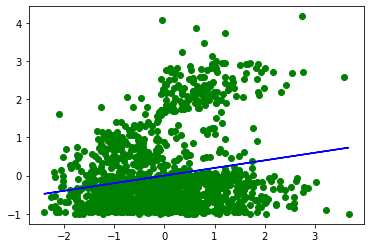

In [66]:
import matplotlib.pyplot as plt
plt.scatter(pre_processed_data["bmi"],pre_processed_data["expenses"], color='green')
plt.plot(pre_processed_data["bmi"],model_pred_sale, color='b')

plt.show()